In [ ]:
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
%matplotlib inline

from geodesic_agent import GeodesicAgent
from gridworld import Arena, Bottleneck, LinearChamber
from plot_utils import plot_replay, plot_traj, plot_need_gain
from RL_utils import oned_twod

*Open field*

In [ ]:
# Physics
width = 10
height = 7
num_states = width * height

# Build object
one_start_state = np.zeros(num_states)
one_start_state[0] = 1
all_start_states = np.ones(num_states) / num_states

init_state_dist = all_start_states
arena = Arena(width, height, init_state_distribution=init_state_dist)
all_experiences = arena.get_all_transitions()
T = arena.transitions

## Agent parameters
corner_goals = np.array([width - 1, (height - 1) * width, height * width - 1]) # Non-start corners
all_goals = np.arange(0, width * height)

goals = all_goals
alpha = 1.0
gamma = 0.95
num_replay_steps = 2

# Set up agent
ga = GeodesicAgent(arena.num_states, arena.num_actions, goals, T, alpha=alpha, gamma=gamma,
                   s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
replayed_experiences, stats_for_nerds = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
needs, gains, all_MEVBs = stats_for_nerds

In [ ]:
# Plot the replayed experiences
print('First %d replay steps' % num_replay_steps, flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(arena, np.array(replayed_experiences).astype(int), ax=ax)
plt.show()

# Plotting params
params = {'min_need' : 0,
          'max_need' : 1}

# Plot need, gain, MEVB throughout each of those steps
meta_need = np.mean(needs, axis=1)
meta_gain = np.mean(gains, axis=1)
meta_MEVB = np.mean(all_MEVBs, axis=1)

for i in range(num_replay_steps):
    print('step %d:' % i, flush=True)
    plot_need_gain(arena, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
                   meta_gain[i, :], meta_MEVB[i, :], params)
    plt.show()

*Bottleneck chamber*

In [ ]:
## Bottleneck
# Physics
room_width = 1
corridor_width = 4
width = room_width * 2 + corridor_width
height = 5
num_states = width * height

# Build object
init_state_dist = np.ones(num_states) / num_states
bottleneck = Bottleneck(room_width, corridor_width, height, init_state_distribution=init_state_dist)
all_experiences = bottleneck.get_all_transitions()
T = bottleneck.transitions

## Agent parameters
goal_states = np.array([width - 1, (height - 1) * width, height * width - 1]) # Non-start corners
goal_states = np.arange(num_states)
alpha = 1.0
gamma = 0.95
num_replay_steps = 20

# Set up agent
ga = GeodesicAgent(bottleneck.num_states, bottleneck.num_actions, goal_states, T, alpha=alpha, gamma=gamma,
                  s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
replayed_experiences, stats_for_nerds = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
needs, gains, all_MEVBs = stats_for_nerds

In [ ]:
# Plot the replayed experiences
print('First 10 replay steps', flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(bottleneck, np.array(replayed_experiences).astype(int), ax=ax)
plt.show()

# Plot need, gain, MEVB throughout each of those steps
meta_need = np.mean(needs, axis=1)
meta_gain = np.mean(gains, axis=1)
meta_MEVB = np.mean(all_MEVBs, axis=1)

for i in range(num_replay_steps):
    print('step', i, flush=True)
    plot_need_gain(bottleneck, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
                   meta_gain[i, :], meta_MEVB[i, :])
    plt.show()

*Linear chamber*

In [1]:
import sys
import time
from pprint import pformat

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as patches
%matplotlib inline

from geodesic_agent import GeodesicAgent
from gridworld import Arena, Bottleneck, LinearChamber
from plot_utils import plot_replay, plot_traj, plot_need_gain
from RL_utils import oned_twod

def dict_print(text, indent_size):
    indent = ' ' * indent_size
    print(''.join([indent + l for l in text.splitlines(True)]))

In [4]:
## Linear chamber
# Physics
length = 30

# Build object
init_state_dist = np.ones(length) / length
tunnel = LinearChamber(length, init_state_distribution=init_state_dist)
all_experiences = tunnel.get_all_transitions()
T = tunnel.transitions

## Agent parameters
goal_states = np.array([length - 1]) # Non-start corners
goal_states = np.arange(length)
alpha = 1.0
gamma = 0.95
num_replay_steps = 50

# Set up agent
ga = GeodesicAgent(tunnel.num_states, tunnel.num_actions, goal_states, T, alpha=alpha, gamma=gamma,
                  s0_dist=init_state_dist)
ga.curr_state = 0
ga.remember(all_experiences) # Pre-load our agent with all possible memories

## Run replay
replayed_experiences, stats_for_nerds, backups = ga.replay(num_steps=num_replay_steps, verbose=True, prospective=True)
needs, gains, all_MEVBs = stats_for_nerds

First 50 replay steps


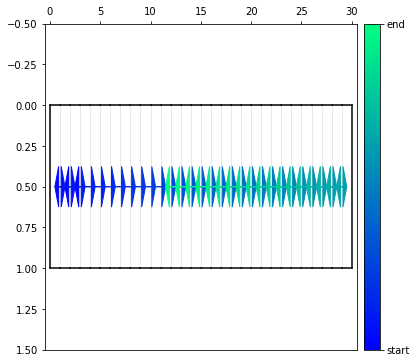

step 0:
	Replayed transition: [3 0 2]
	Backup dictionary:
        {0: [],
         1: [],
         2: [],
         3: [],
         4: [],
         5: [],
         6: [],
         7: [],
         8: [],
         9: [],
         10: [],
         11: [],
         12: [],
         13: [],
         14: [],
         15: [],
         16: [],
         17: [],
         18: [],
         19: [],
         20: [],
         21: [],
         22: [],
         23: [],
         24: [],
         25: [],
         26: [],
         27: [],
         28: [],
         29: []}
	Replay history:


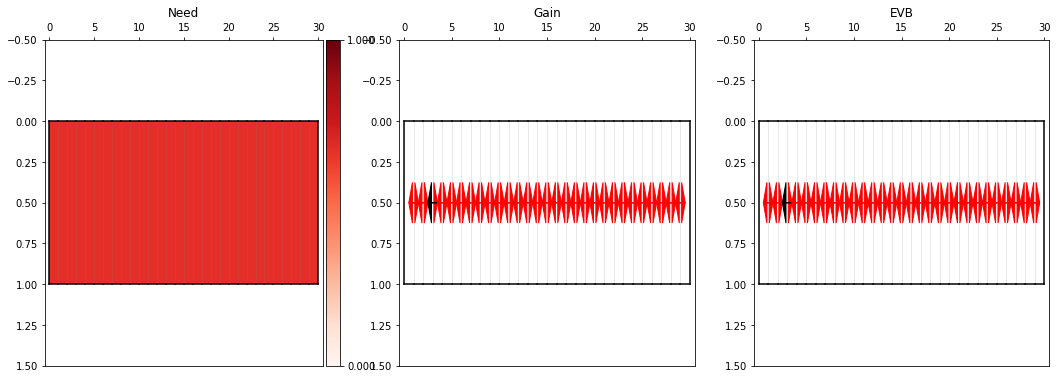

step 1:
	Replayed transition: [2 0 1]
	Backup dictionary:
        {0: [(3, 0, 2)],
         1: [(3, 0, 2)],
         2: [],
         3: [],
         4: [(3, 0, 2)],
         5: [(3, 0, 2)],
         6: [(3, 0, 2)],
         7: [(3, 0, 2)],
         8: [(3, 0, 2)],
         9: [(3, 0, 2)],
         10: [(3, 0, 2)],
         11: [(3, 0, 2)],
         12: [(3, 0, 2)],
         13: [(3, 0, 2)],
         14: [(3, 0, 2)],
         15: [(3, 0, 2)],
         16: [(3, 0, 2)],
         17: [(3, 0, 2)],
         18: [(3, 0, 2)],
         19: [(3, 0, 2)],
         20: [(3, 0, 2)],
         21: [(3, 0, 2)],
         22: [(3, 0, 2)],
         23: [(3, 0, 2)],
         24: [(3, 0, 2)],
         25: [(3, 0, 2)],
         26: [(3, 0, 2)],
         27: [(3, 0, 2)],
         28: [(3, 0, 2)],
         29: [(3, 0, 2)]}
	Replay history:
		 [3 0 2]


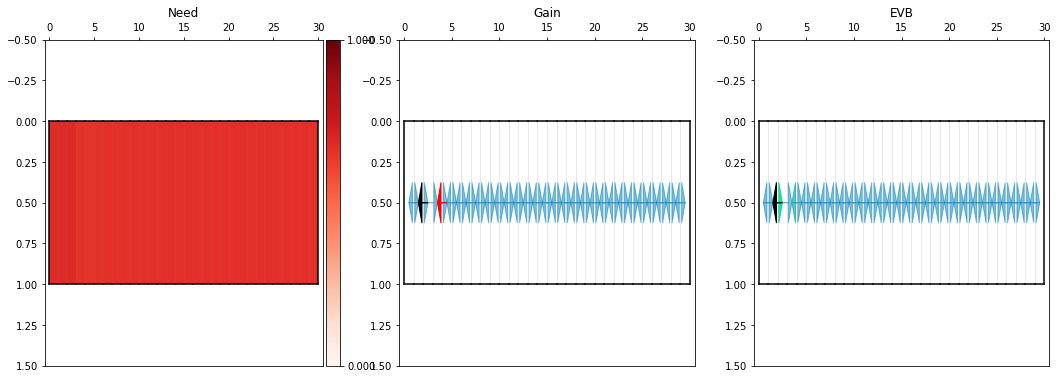

step 2:
	Replayed transition: [1 0 0]
	Backup dictionary:
        {0: [(3, 0, 2), (2, 0, 1)],
         1: [],
         2: [],
         3: [(2, 0, 1)],
         4: [(3, 0, 2), (2, 0, 1)],
         5: [(3, 0, 2), (2, 0, 1)],
         6: [(3, 0, 2), (2, 0, 1)],
         7: [(3, 0, 2), (2, 0, 1)],
         8: [(3, 0, 2), (2, 0, 1)],
         9: [(3, 0, 2), (2, 0, 1)],
         10: [(3, 0, 2), (2, 0, 1)],
         11: [(3, 0, 2), (2, 0, 1)],
         12: [(3, 0, 2), (2, 0, 1)],
         13: [(3, 0, 2), (2, 0, 1)],
         14: [(3, 0, 2), (2, 0, 1)],
         15: [(3, 0, 2), (2, 0, 1)],
         16: [(3, 0, 2), (2, 0, 1)],
         17: [(3, 0, 2), (2, 0, 1)],
         18: [(3, 0, 2), (2, 0, 1)],
         19: [(3, 0, 2), (2, 0, 1)],
         20: [(3, 0, 2), (2, 0, 1)],
         21: [(3, 0, 2), (2, 0, 1)],
         22: [(3, 0, 2), (2, 0, 1)],
         23: [(3, 0, 2), (2, 0, 1)],
         24: [(3, 0, 2), (2, 0, 1)],
         25: [(3, 0, 2), (2, 0, 1)],
         26: [(3, 0, 2), (2, 0, 1)],
    

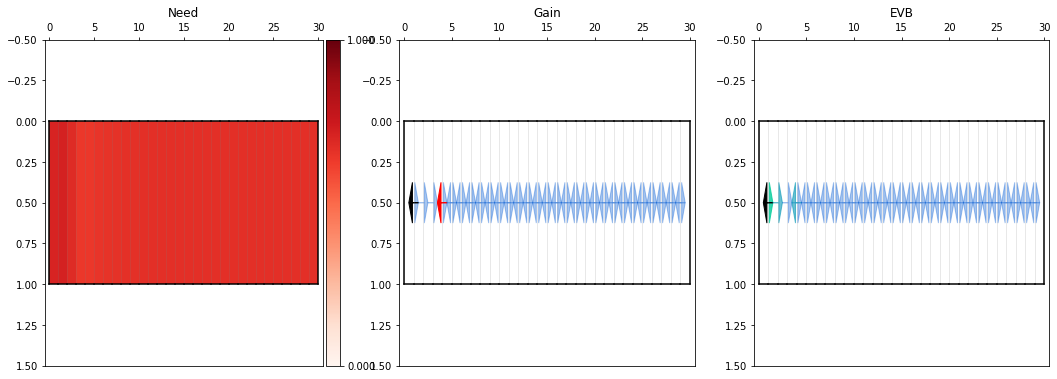

step 3:
	Replayed transition: [0 2 1]
	Backup dictionary:
        {0: [],
         1: [],
         2: [(1, 0, 0)],
         3: [(2, 0, 1), (1, 0, 0)],
         4: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         5: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         6: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         7: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         8: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         9: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         10: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         11: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         12: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         13: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         14: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         15: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         16: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         17: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         18: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         19: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         20: [(3, 0, 2), (2, 0, 1), (1, 0, 0)],
         21: [(3, 0, 2), (2, 0, 1), (1,

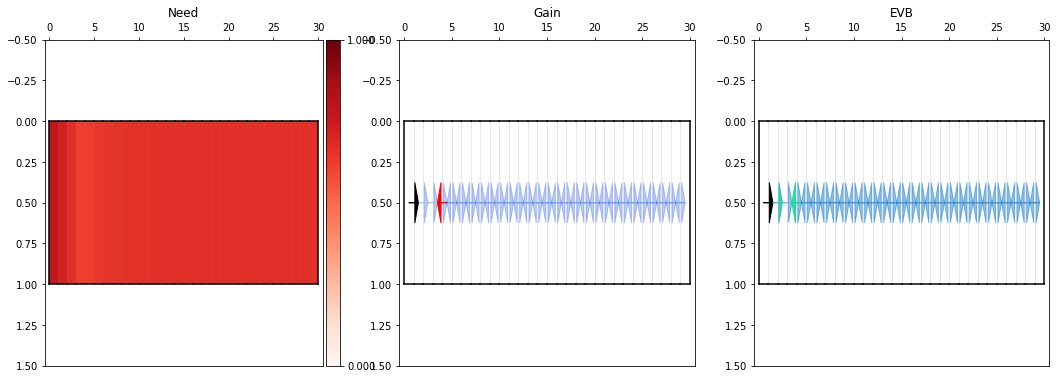

step 4:
	Replayed transition: [1 2 2]
	Backup dictionary:
        {0: [],
         1: [],
         2: [(1, 0, 0), (0, 2, 1)],
         3: [(2, 0, 1), (1, 0, 0), (0, 2, 1)],
         4: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         5: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         6: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         7: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         8: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         9: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         10: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         11: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         12: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         13: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         14: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         15: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         16: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
         17: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1)],
       

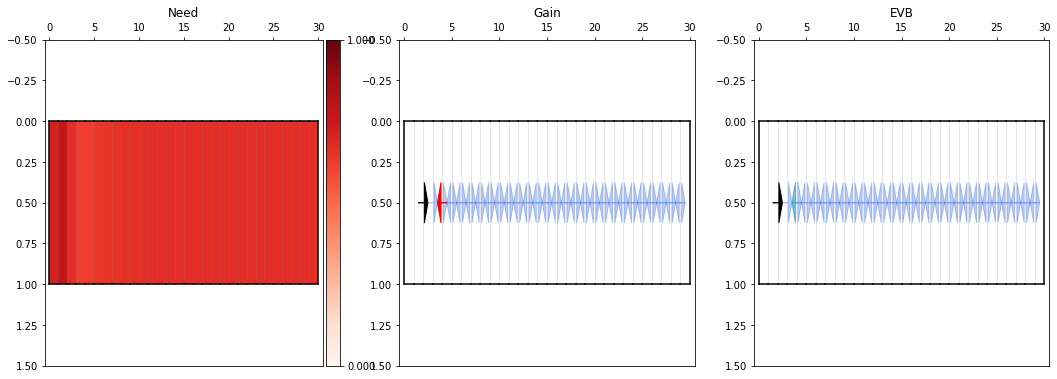

step 5:
	Replayed transition: [2 2 3]
	Backup dictionary:
        {0: [],
         1: [],
         2: [],
         3: [(2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         4: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         5: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         6: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         7: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         8: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         9: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         10: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         11: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         12: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         13: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         14: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
         15: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2)],
  

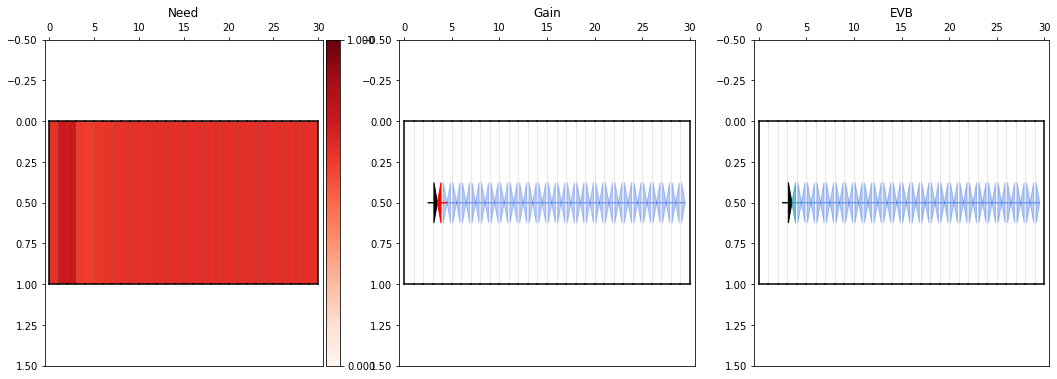

step 6:
	Replayed transition: [3 2 4]
	Backup dictionary:
        {0: [(2, 2, 3)],
         1: [],
         2: [],
         3: [],
         4: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         5: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         6: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         7: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         8: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         9: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         10: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         11: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         12: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         13: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 2), (2, 2, 3)],
         14: [(3, 0, 2), (2, 0, 1), (1, 0, 0), (0, 2, 1), (1, 2, 

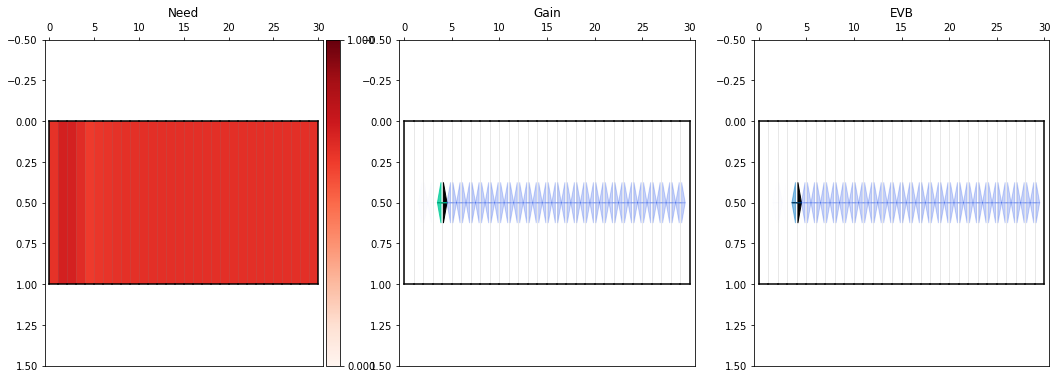

step 7:
	Replayed transition: [4 2 5]
	Backup dictionary:
        {0: [],
         1: [],
         2: [],
         3: [],
         4: [],
         5: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4)],
         6: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4)],
         7: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4)],
         8: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4)],
         9: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4)],
         10: [(3,

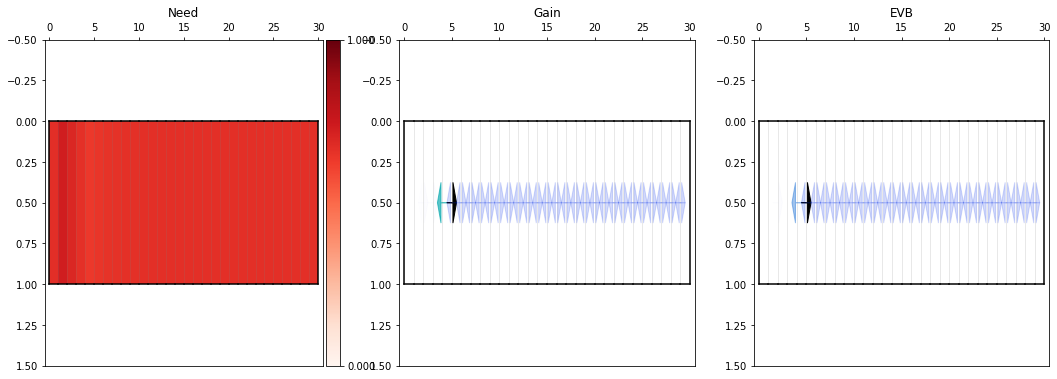

step 8:
	Replayed transition: [5 2 6]
	Backup dictionary:
        {0: [(4, 2, 5)],
         1: [(4, 2, 5)],
         2: [(4, 2, 5)],
         3: [(4, 2, 5)],
         4: [],
         5: [],
         6: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5)],
         7: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5)],
         8: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5)],
         9: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5)],
         10: [(3, 0, 2),
             

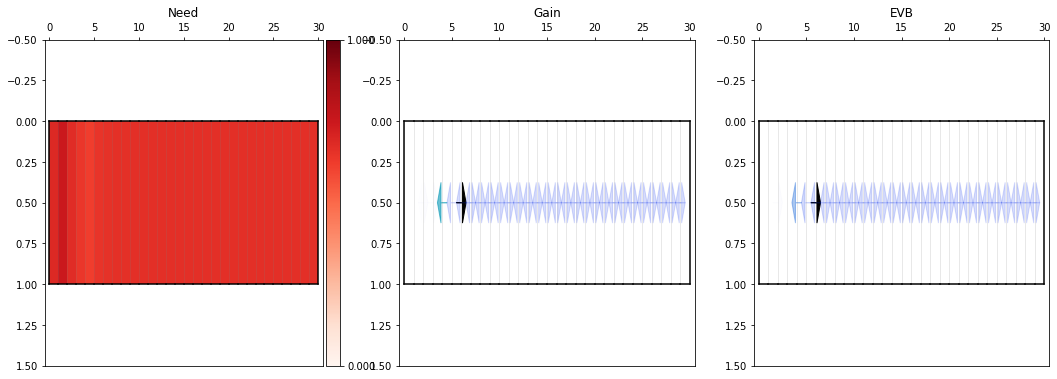

step 9:
	Replayed transition: [6 2 7]
	Backup dictionary:
        {0: [(4, 2, 5), (5, 2, 6)],
         1: [(4, 2, 5), (5, 2, 6)],
         2: [(4, 2, 5), (5, 2, 6)],
         3: [(4, 2, 5), (5, 2, 6)],
         4: [(5, 2, 6)],
         5: [],
         6: [],
         7: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5),
             (5, 2, 6)],
         8: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5),
             (5, 2, 6)],
         9: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5),
             (5, 2, 6)],
         10: [(3, 0, 2),
              (2, 0, 1),
              (1, 0, 0),
              (

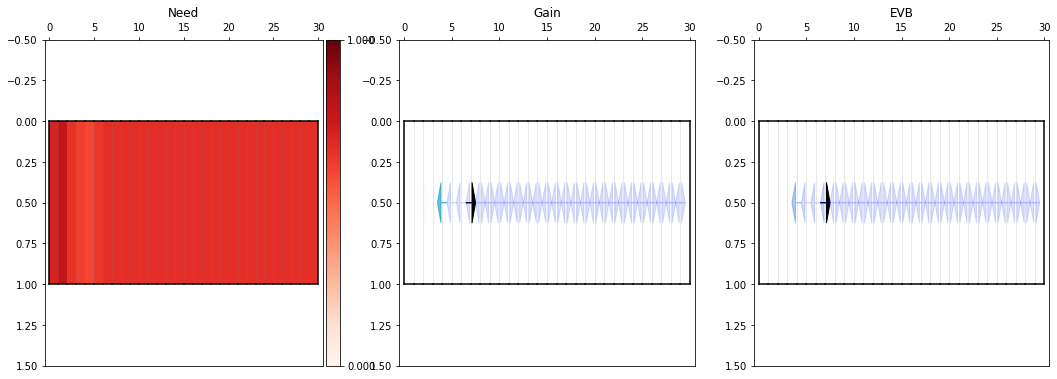

step 10:
	Replayed transition: [7 2 8]
	Backup dictionary:
        {0: [(4, 2, 5), (5, 2, 6), (6, 2, 7)],
         1: [(4, 2, 5), (5, 2, 6), (6, 2, 7)],
         2: [(4, 2, 5), (5, 2, 6), (6, 2, 7)],
         3: [(4, 2, 5), (5, 2, 6), (6, 2, 7)],
         4: [(5, 2, 6), (6, 2, 7)],
         5: [(6, 2, 7)],
         6: [],
         7: [],
         8: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5),
             (5, 2, 6),
             (6, 2, 7)],
         9: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5),
             (5, 2, 6),
             (6, 2, 7)],
         10: [(3, 0, 2),
              (2, 0, 1),
              (1, 0, 0),
              (0, 2, 1),
              (1, 2, 2),
              (2, 2, 3),
              (3, 2, 4),
   

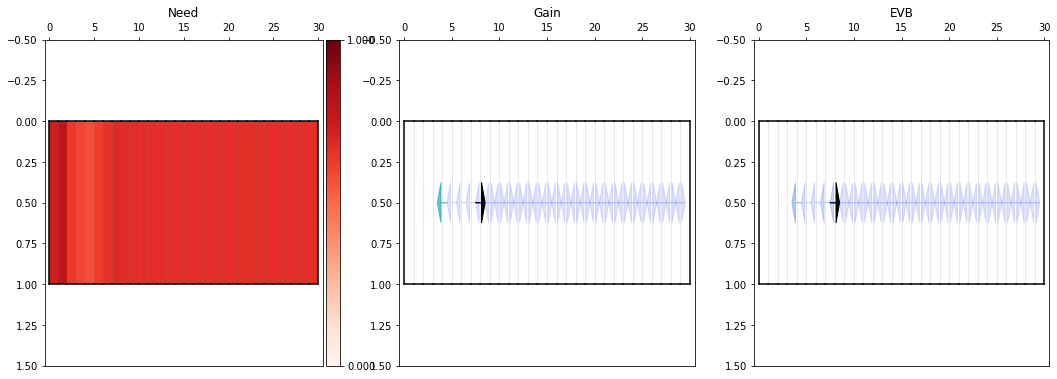

step 11:
	Replayed transition: [8 2 9]
	Backup dictionary:
        {0: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8)],
         1: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8)],
         2: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8)],
         3: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8)],
         4: [(5, 2, 6), (6, 2, 7), (7, 2, 8)],
         5: [(6, 2, 7), (7, 2, 8)],
         6: [(7, 2, 8)],
         7: [],
         8: [],
         9: [(3, 0, 2),
             (2, 0, 1),
             (1, 0, 0),
             (0, 2, 1),
             (1, 2, 2),
             (2, 2, 3),
             (3, 2, 4),
             (4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8)],
         10: [(3, 0, 2),
              (2, 0, 1),
              (1, 0, 0),
              (0, 2, 1),
              (1, 2, 2),
              (2, 2, 3),
              (3, 2, 4),
              (4, 2, 5),
              (5, 2, 6),
              (6, 2, 7),
              (7, 2, 8)],
         11: [(3, 0, 2),
   

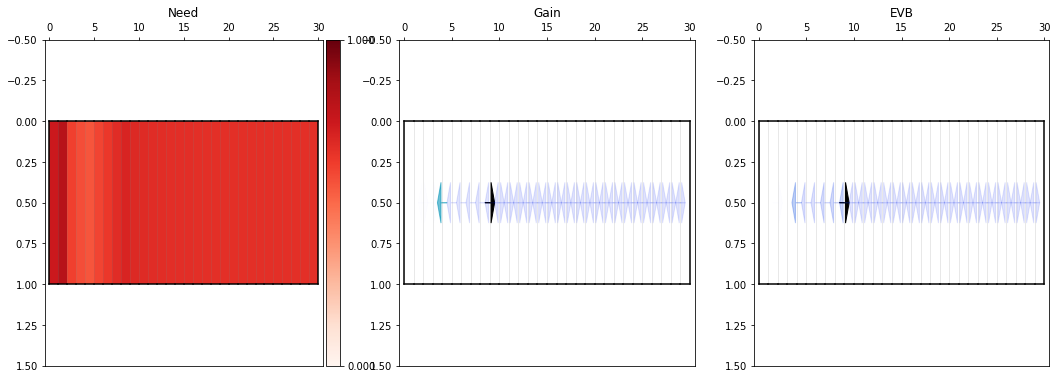

step 12:
	Replayed transition: [ 9  2 10]
	Backup dictionary:
        {0: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9)],
         1: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9)],
         2: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9)],
         3: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9)],
         4: [(5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9)],
         5: [(6, 2, 7), (7, 2, 8), (8, 2, 9)],
         6: [(7, 2, 8), (8, 2, 9)],
         7: [(8, 2, 9)],
         8: [],
         9: [],
         10: [(3, 0, 2),
              (2, 0, 1),
              (1, 0, 0),
              (0, 2, 1),
              (1, 2, 2),
              (2, 2, 3),
              (3, 2, 4),
              (4, 2, 5),
              (5, 2, 6),
              (6, 2, 7),
              (7, 2, 8),
              (8, 2, 9)],
         11: [(3, 0, 2),
              (2, 0, 1),
              (1, 0, 0),
              (0, 2, 1),
              (1, 2, 2),
              (2, 2, 3),
             

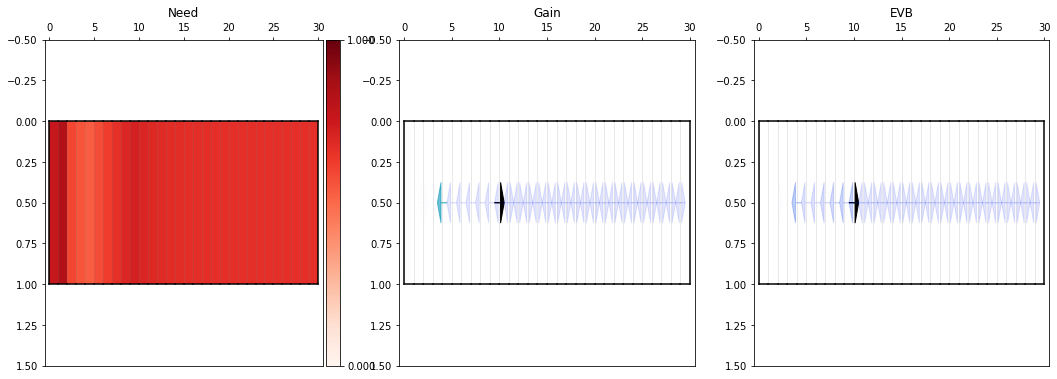

step 13:
	Replayed transition: [10  2 11]
	Backup dictionary:
        {0: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10)],
         1: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10)],
         2: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10)],
         3: [(4, 2, 5), (5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10)],
         4: [(5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10)],
         5: [(6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10)],
         6: [(7, 2, 8), (8, 2, 9), (9, 2, 10)],
         7: [(8, 2, 9), (9, 2, 10)],
         8: [(9, 2, 10)],
         9: [],
         10: [],
         11: [(3, 0, 2),
              (2, 0, 1),
              (1, 0, 0),
              (0, 2, 1),
              (1, 2, 2),
              (2, 2, 3),
              (3, 2, 4),
              (4, 2, 5),
              (5, 2, 6),
              (6, 2, 7),
              (7, 2, 8),
              (8, 2, 9),
              (9, 2, 10)],
         12: [

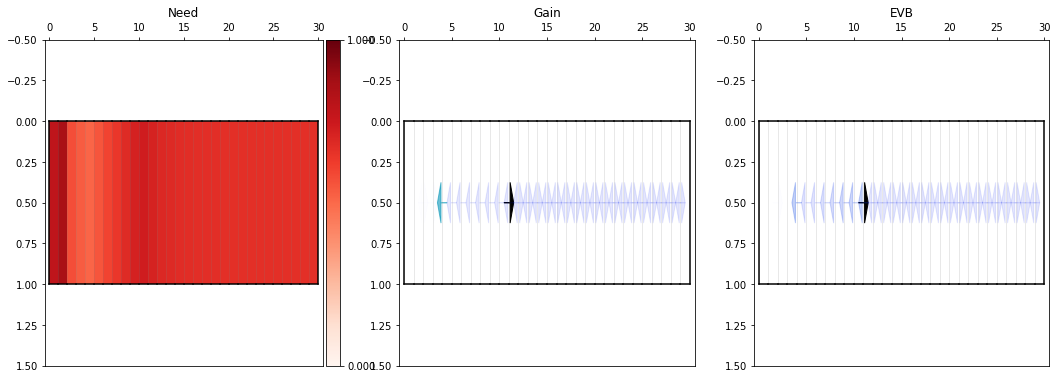

step 14:
	Replayed transition: [11  2 12]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11)],
         3: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11)],
         4: [(5, 2, 6), (6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10), (10, 2, 11)],
         5: [(6, 2, 7), (7, 2, 8), (8, 2, 9), (9, 2, 10), (10, 2, 11)],
         6: [(7, 2, 8), (8, 2, 9), (9, 2, 10), (10, 2, 11)],
         7: [(8, 2, 9), (9, 2, 10)

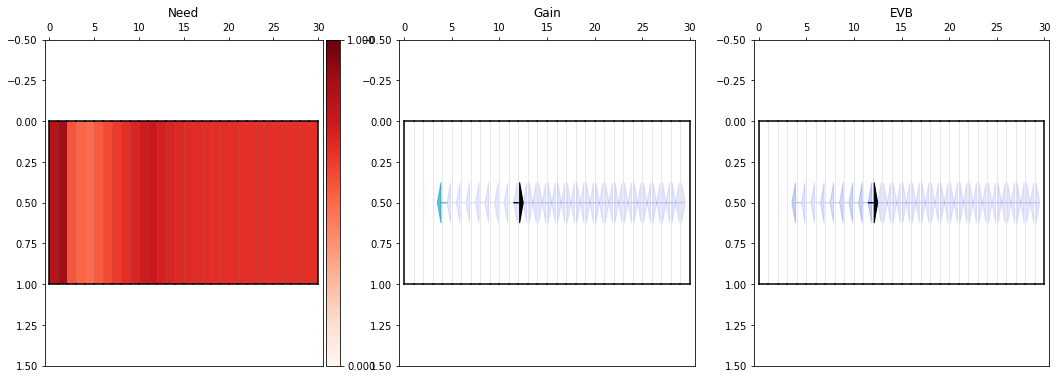

step 15:
	Replayed transition: [12  2 13]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12)],
         3: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12)],
         4: [(5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),

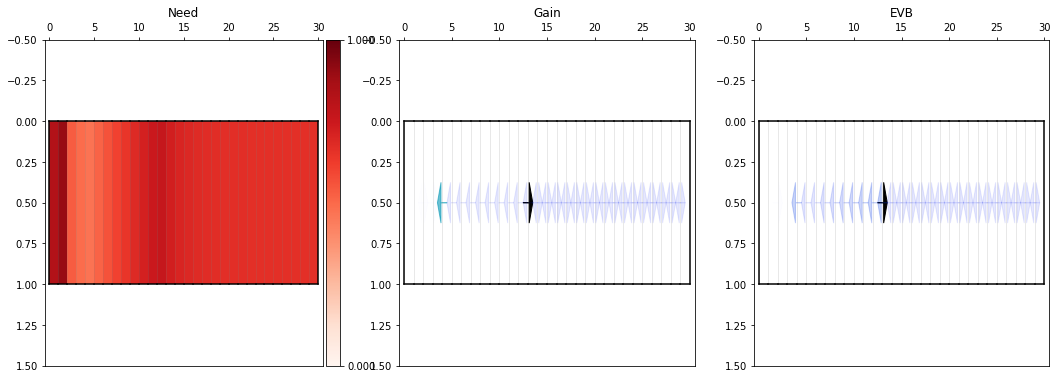

step 16:
	Replayed transition: [13  2 14]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13)],
         3: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13)],
         4: [(5, 2, 6),
             (6, 2

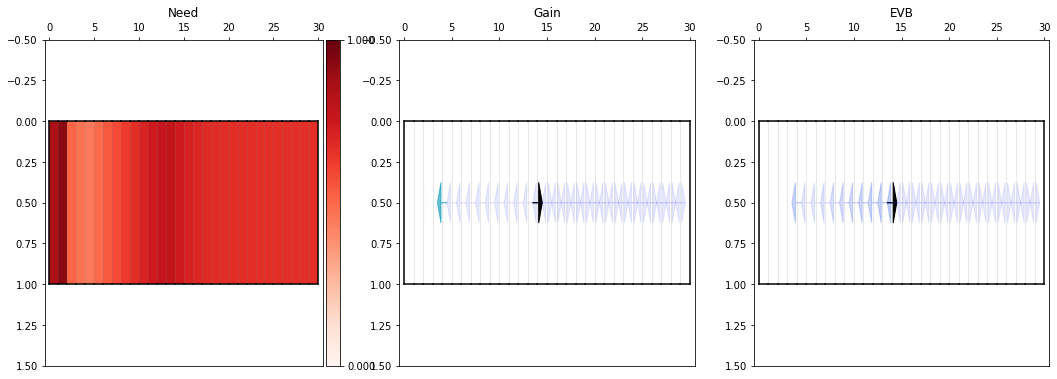

step 17:
	Replayed transition: [14  2 15]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14)],
         3: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11,

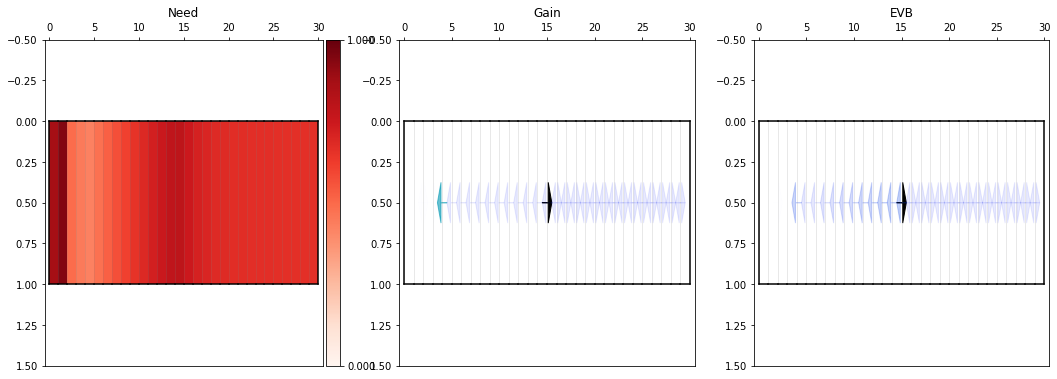

step 18:
	Replayed transition: [15  2 16]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15)],
         3: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (

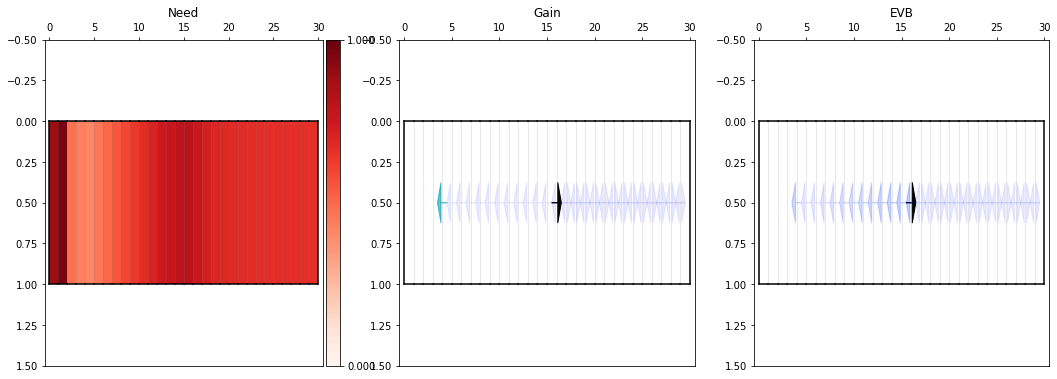

step 19:
	Replayed transition: [16  2 17]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16)],
         3: [(4, 2, 5),
        

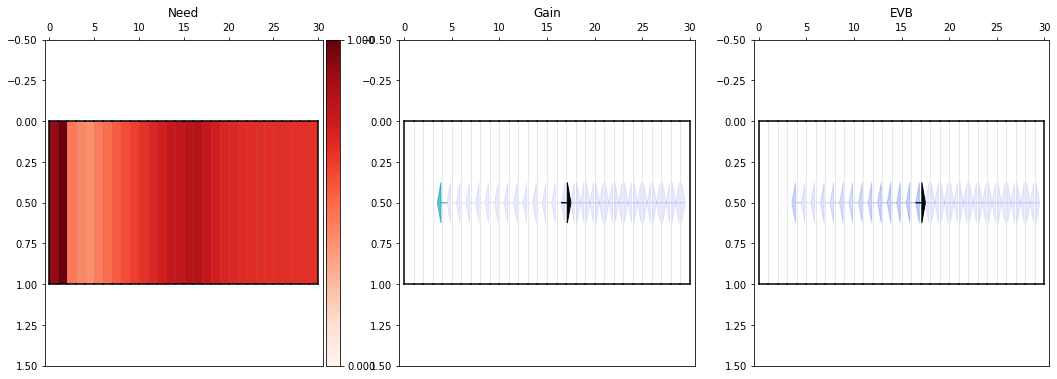

step 20:
	Replayed transition: [17  2 18]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
       

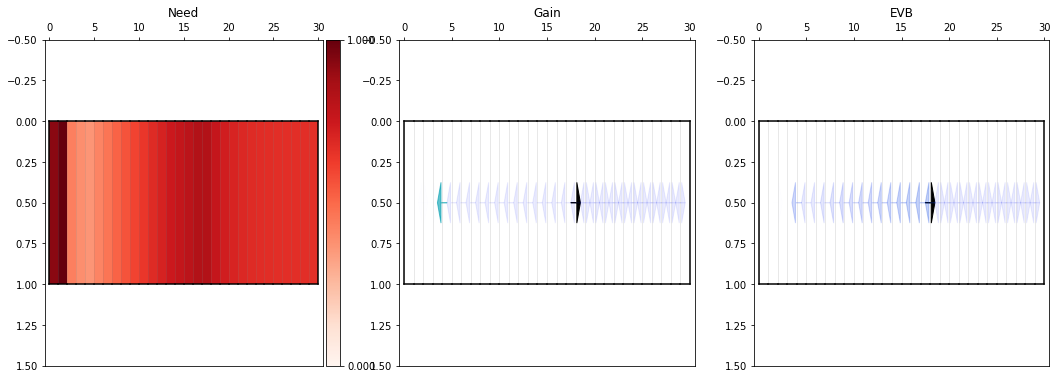

step 21:
	Replayed transition: [18  2 19]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
       

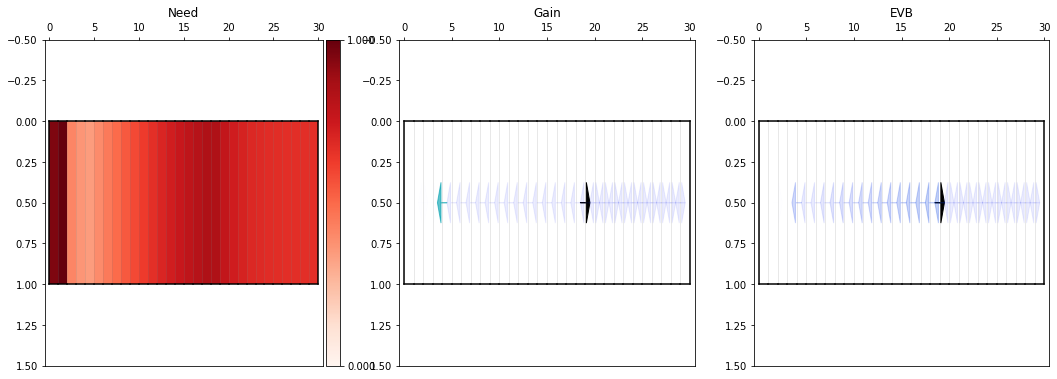

step 22:
	Replayed transition: [19  2 20]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
       

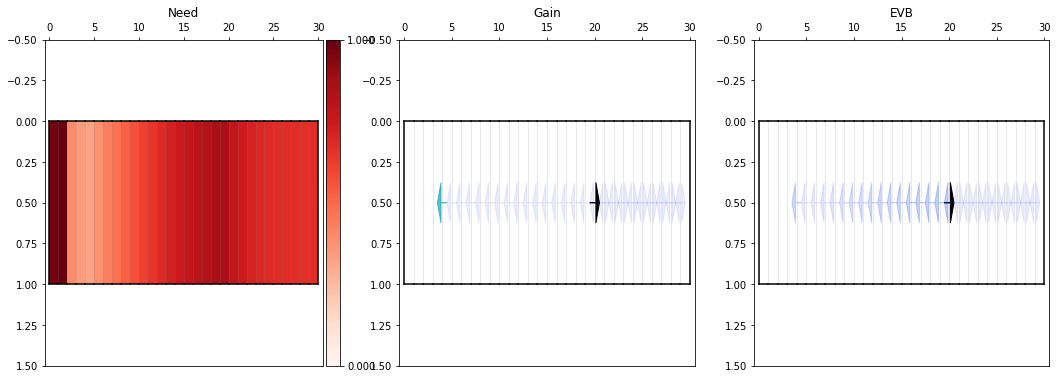

step 23:
	Replayed transition: [20  2 21]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
      

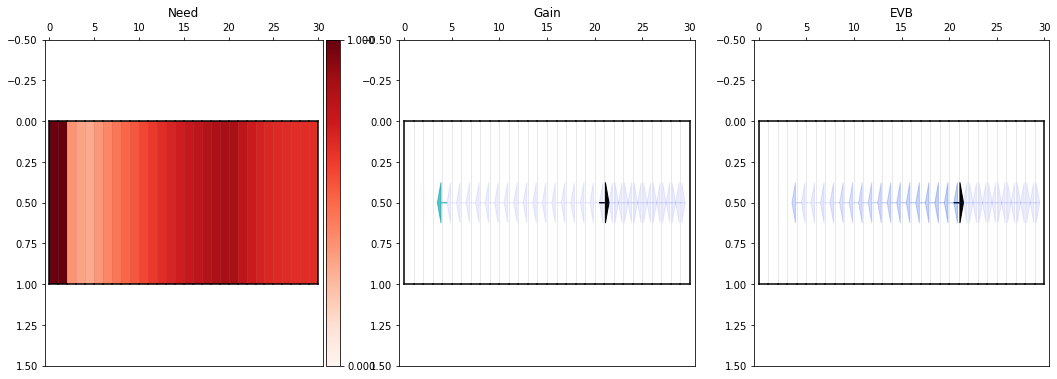

step 24:
	Replayed transition: [21  2 22]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21)],
         2: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
  

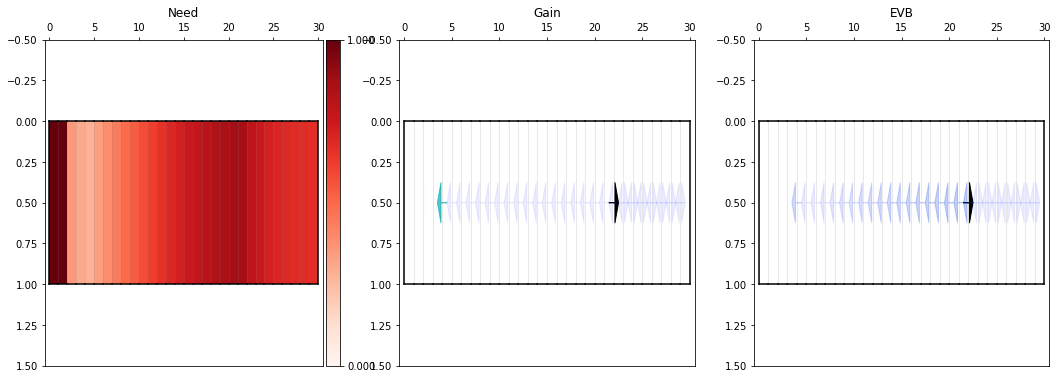

step 25:
	Replayed transition: [22  2 23]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22)],
         2: [(4, 2, 5)

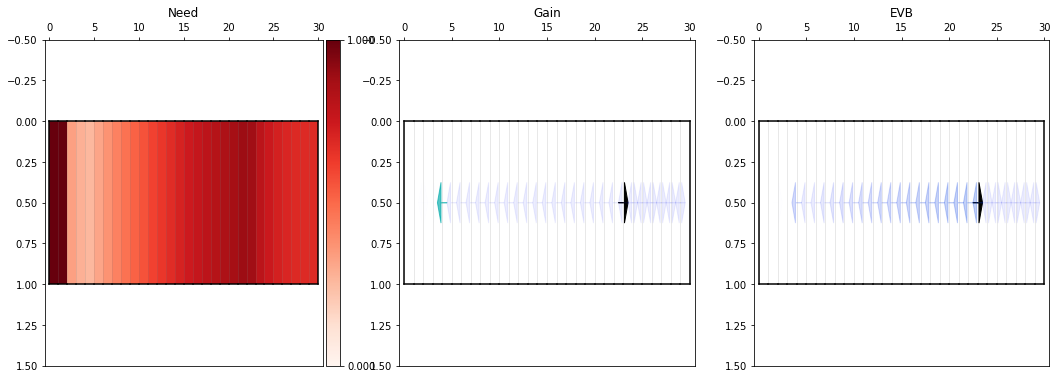

step 26:
	Replayed transition: [23  2 24]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22

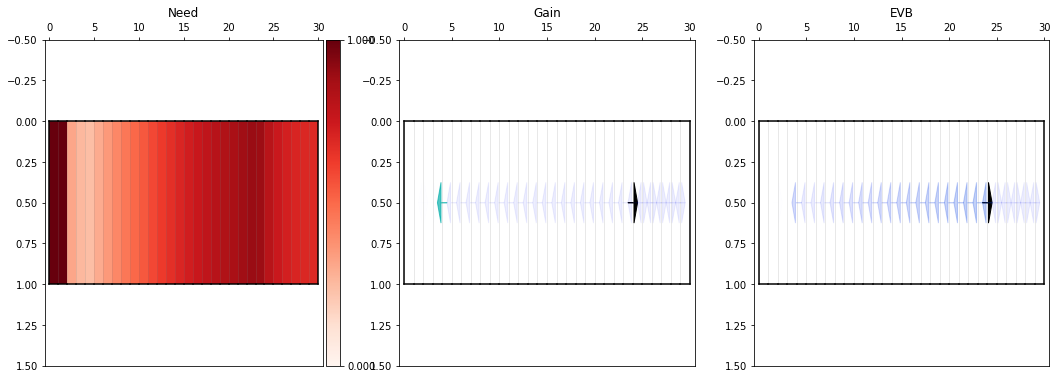

step 27:
	Replayed transition: [24  2 25]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21

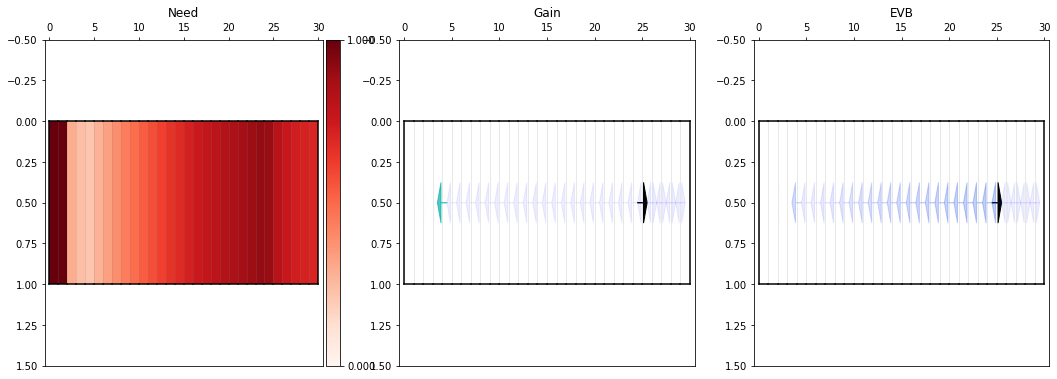

step 28:
	Replayed transition: [25  2 26]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20

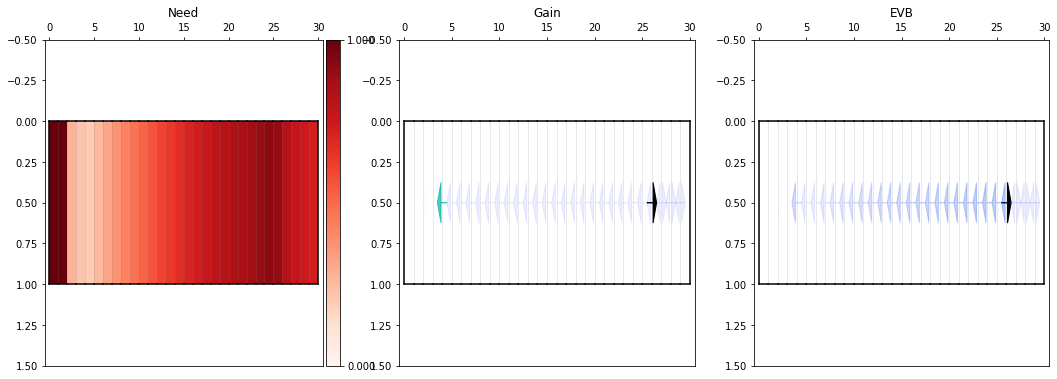

step 29:
	Replayed transition: [26  2 27]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19

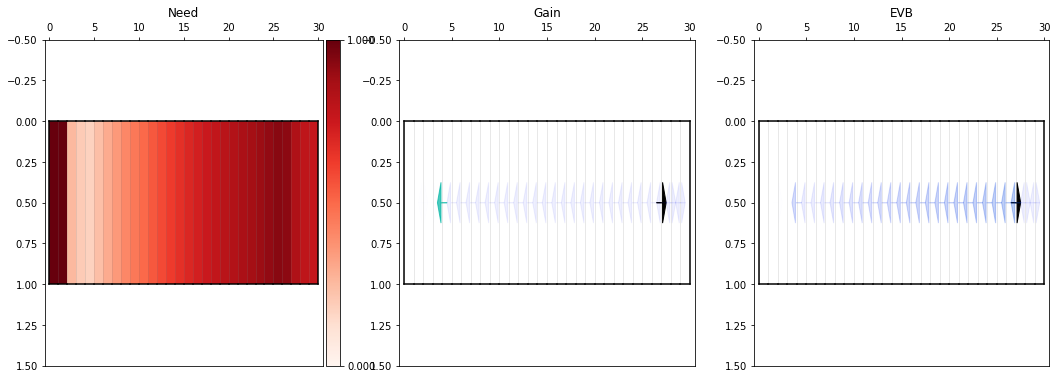

step 30:
	Replayed transition: [27  2 28]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18

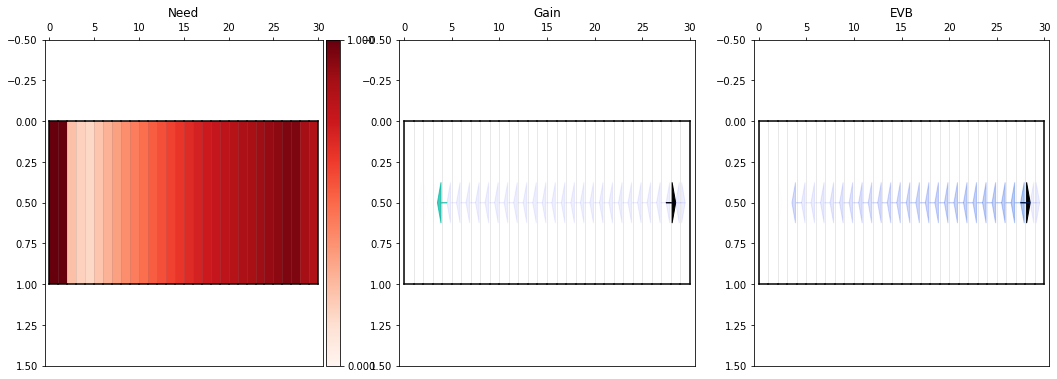

step 31:
	Replayed transition: [28  2 29]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17

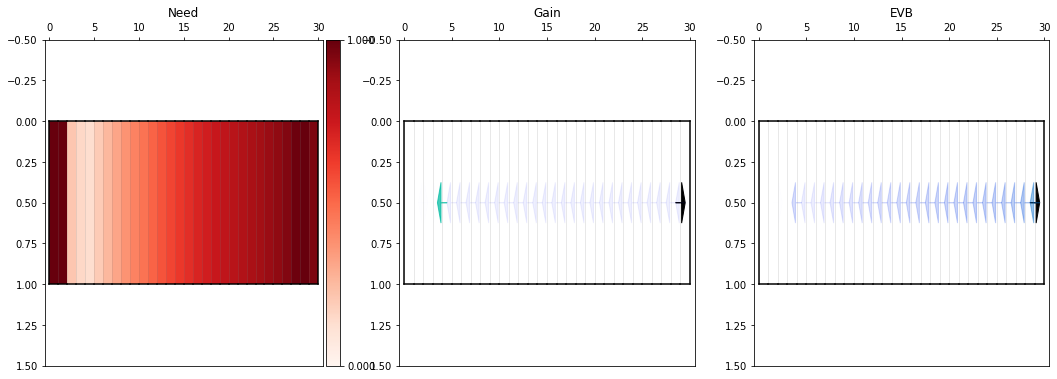

step 32:
	Replayed transition: [29  0 28]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16

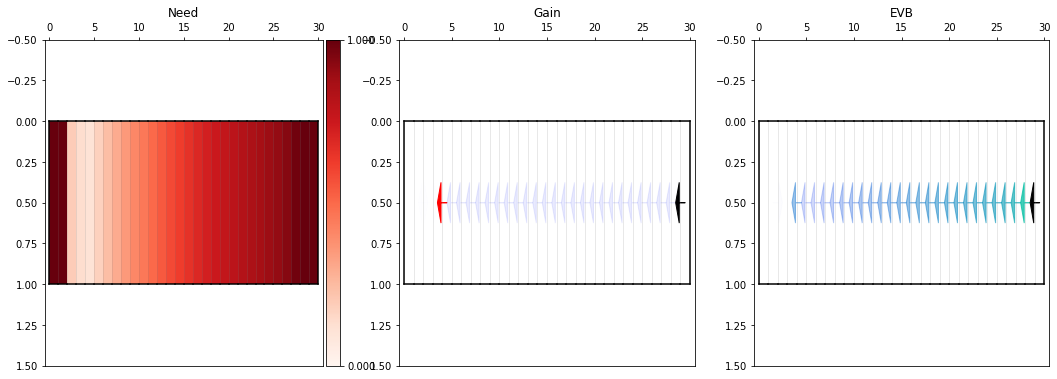

step 33:
	Replayed transition: [28  0 27]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15

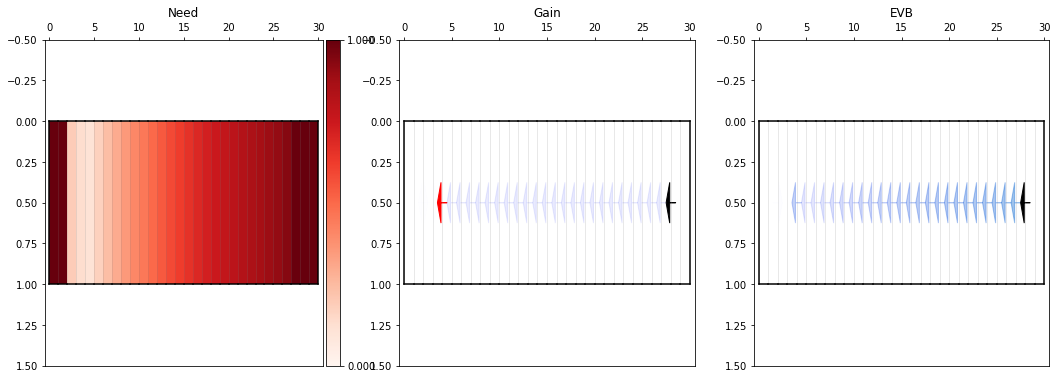

step 34:
	Replayed transition: [27  0 26]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14

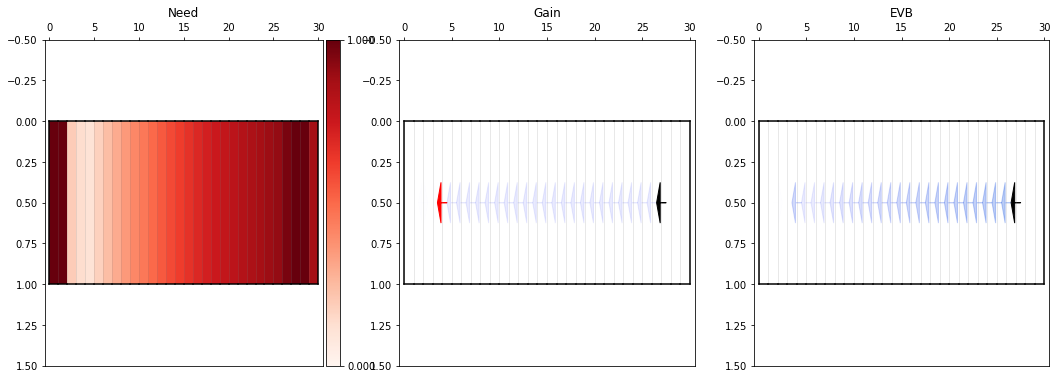

step 35:
	Replayed transition: [26  0 25]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13

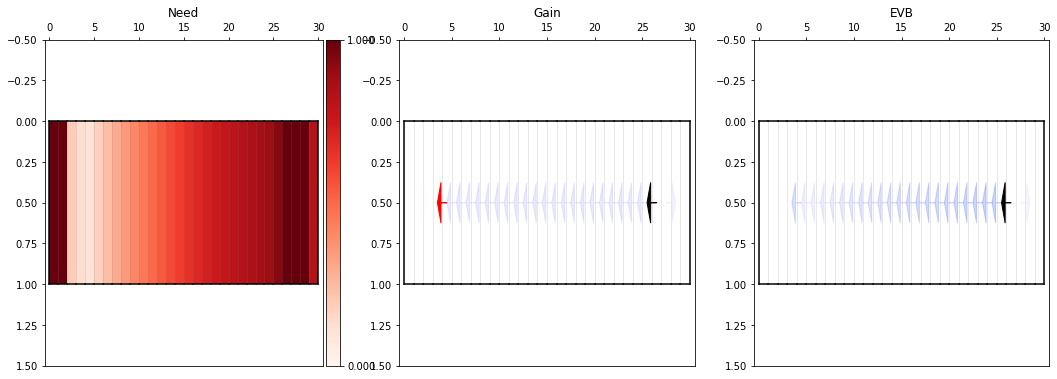

step 36:
	Replayed transition: [25  0 24]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12

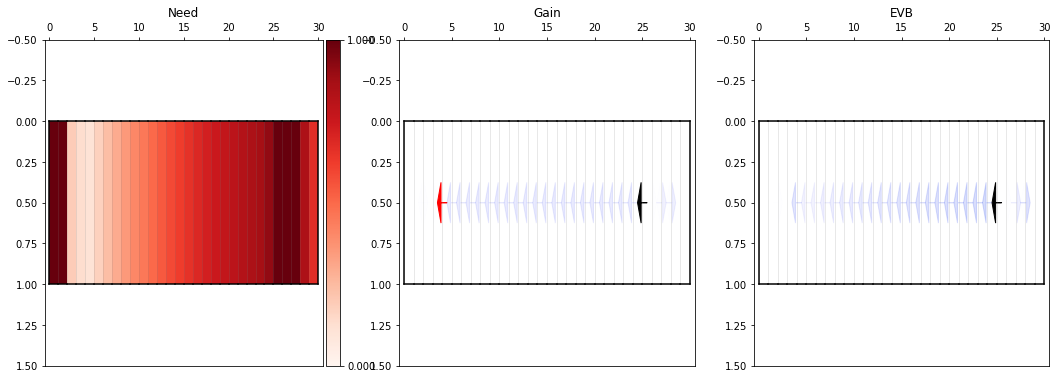

step 37:
	Replayed transition: [24  0 23]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25),
             (25, 0, 24)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11

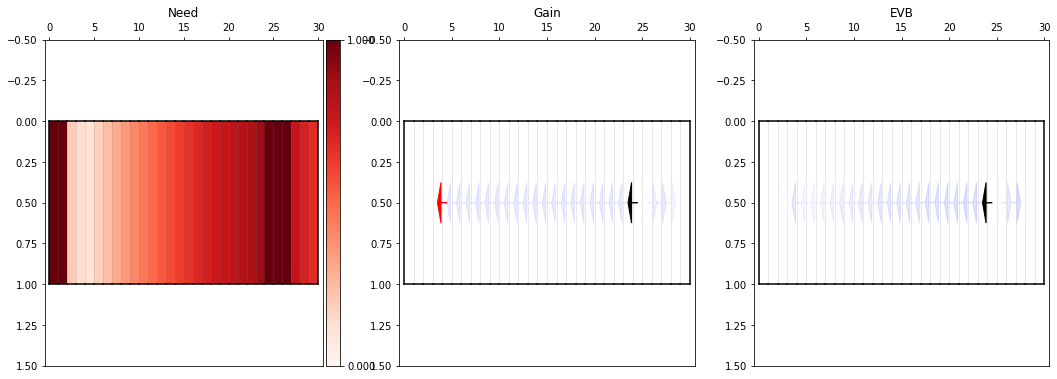

step 38:
	Replayed transition: [23  0 22]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25),
             (25, 0, 24),
             (24, 0, 23)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10

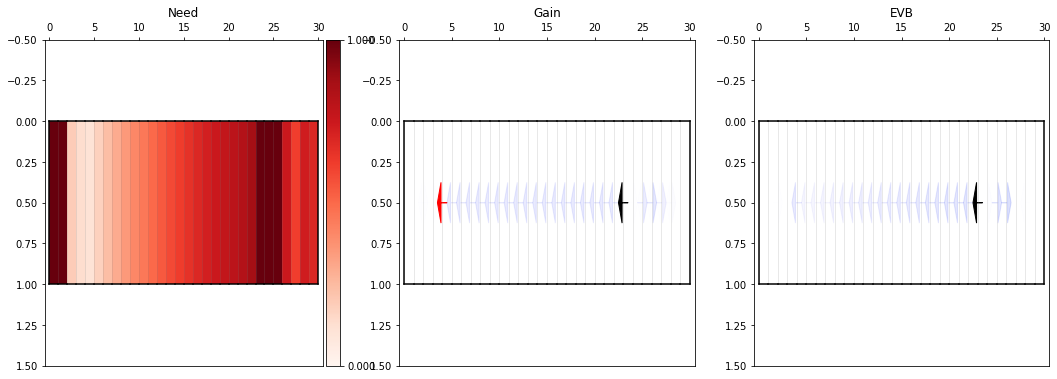

step 39:
	Replayed transition: [22  0 21]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25),
             (25, 0, 24),
             (24, 0, 23),
             (23, 0, 22)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 

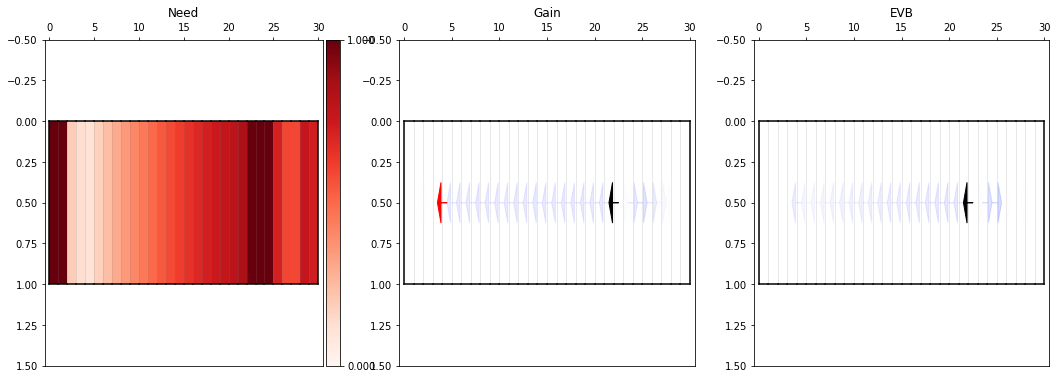

step 40:
	Replayed transition: [21  0 20]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25),
             (25, 0, 24),
             (24, 0, 23),
             (23, 0, 22),
             (22, 0, 21)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2

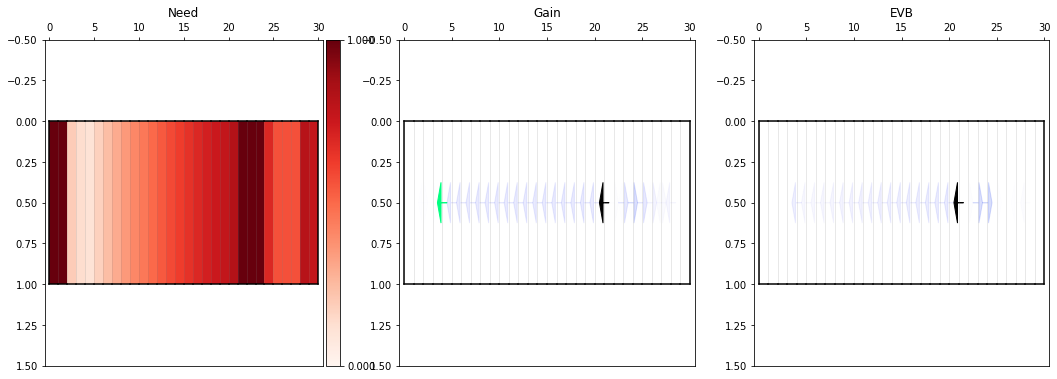

step 41:
	Replayed transition: [20  0 19]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25),
             (25, 0, 24),
             (24, 0, 23),
             (23, 0, 22),
             (22, 0, 21),
             (21, 0, 20)],
         1: [(4, 2, 5),
             (5, 2, 6),
             (6,

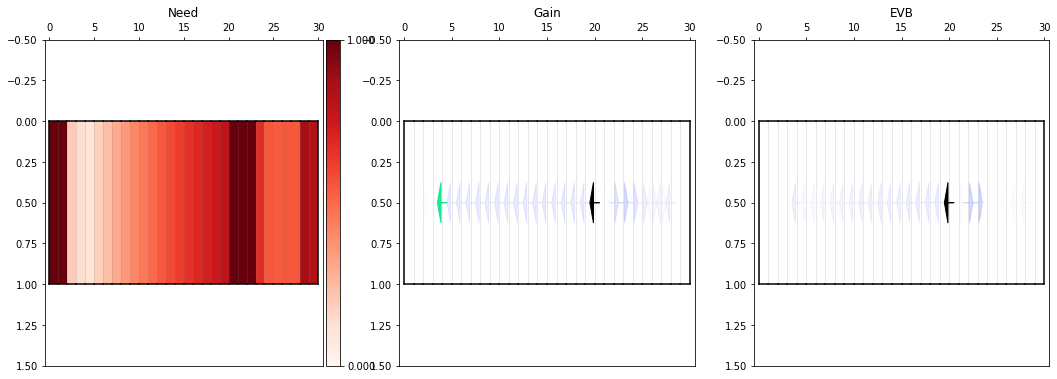

step 42:
	Replayed transition: [19  0 18]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25),
             (25, 0, 24),
             (24, 0, 23),
             (23, 0, 22),
             (22, 0, 21),
             (21, 0, 20),
             (20, 0, 19)],
         1: [(4, 2, 5),
             (

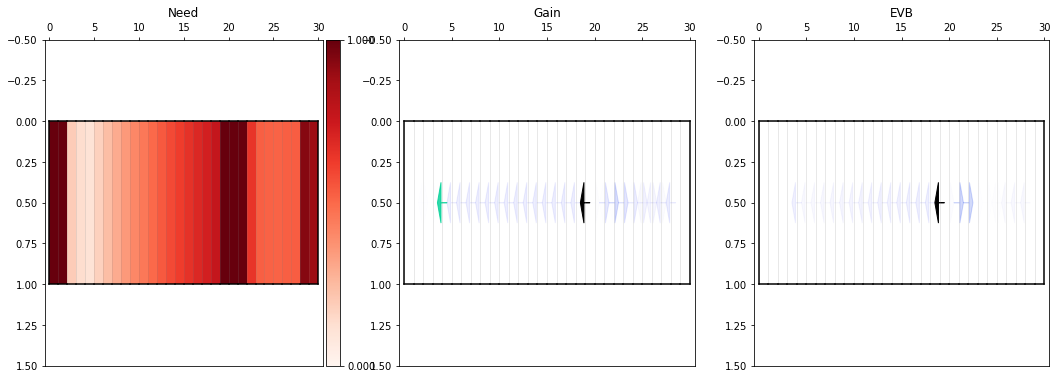

step 43:
	Replayed transition: [18  0 17]
	Backup dictionary:
        {0: [(4, 2, 5),
             (5, 2, 6),
             (6, 2, 7),
             (7, 2, 8),
             (8, 2, 9),
             (9, 2, 10),
             (10, 2, 11),
             (11, 2, 12),
             (12, 2, 13),
             (13, 2, 14),
             (14, 2, 15),
             (15, 2, 16),
             (16, 2, 17),
             (17, 2, 18),
             (18, 2, 19),
             (19, 2, 20),
             (20, 2, 21),
             (21, 2, 22),
             (22, 2, 23),
             (23, 2, 24),
             (24, 2, 25),
             (25, 2, 26),
             (26, 2, 27),
             (27, 2, 28),
             (28, 2, 29),
             (29, 0, 28),
             (28, 0, 27),
             (27, 0, 26),
             (26, 0, 25),
             (25, 0, 24),
             (24, 0, 23),
             (23, 0, 22),
             (22, 0, 21),
             (21, 0, 20),
             (20, 0, 19),
             (19, 0, 18)],
         1: 

KeyboardInterrupt: 

In [5]:
# Plot the replayed experiences
print('First %d replay steps' % num_replay_steps, flush=True)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
plot_replay(tunnel, np.array(replayed_experiences).astype(int), ax=ax)
plt.show()

# Plotting params
params = {'min_need' : 0,
          'max_need' : 1}

# Plot need, gain, MEVB throughout each of those steps
meta_need = np.mean(needs, axis=1)
meta_gain = np.mean(gains, axis=1)
meta_MEVB = np.mean(all_MEVBs, axis=1)
verbose = True

for i in range(num_replay_steps):
    print('step %d:' % i)
    if verbose:
        print('\tReplayed transition:', replayed_experiences[i])
        print('\tBackup dictionary:')
        dict_print(pformat(backups[i]), indent_size=8)
        print('\tReplay history:')
        for j in range(i):
            print('\t\t',replayed_experiences[j]) # so dumb

    plot_need_gain(tunnel, ga.memory, np.average(meta_need[i, :, :], weights=init_state_dist, axis=0), 
                   meta_gain[i, :], meta_MEVB[i, :], specials=[tuple(replayed_experiences[i])], params=params)
    plt.show()